# 1 Accessing Text Corpora


The following cells will show how to get a corpust from nltk and apply simple statistics to it

## 1.1 Gutenberg Corpus

In [23]:
# import nltk and get the gutenberg corpus
# fileids() get the files form the corpus
import nltk
nltk.corpus.gutenberg.fileids()


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [24]:
# From gutenberg corpus, get emma text in words
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

In [25]:
# An alternative is to do the following, which is shorter to use
from nltk.corpus import gutenberg
gutenberg.fileids()
emma = gutenberg.words('austen-emma.txt')

In [26]:
# Printing some statistics from the files on gutenberg corpus
# average word length, average sentence length and the number of times each vocabulary appears on the text on average

# Also, observe that the raw() function access the text without tokenization, so each element of it is a character 
#(including spaces)

for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


## 1.2 Web and Chat Text

## 1.3 Brown Corpus

In [27]:
# Now using another corpus, the Brown Corpus, with many genre (categories) of texts

from nltk.corpus import brown
brown.categories()


['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [28]:
# Some functions to access text from a certain category, a certain file or a a range of categories, etc.
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [29]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [30]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [31]:
# An example of conditional frequency list from the brown corpus to study the use of modal verbs in different genres

cfd = nltk.ConditionalFreqDist(
          (genre, word)
          for genre in brown.categories()
          for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


Obs.: Info about other corpora on Sections 1.6 and 1.7.
Info on how to using corpus accessment funtions on Section 1.8


## 1.4 Reuters Corpus

## 1.5 Inaugural Address Corpus

## 1.6 Annotated Text Corpora

## 1.7 Corpora in Other Languages

## 1.8 Text Corpus Structure

## 1.9 Loading your own Corpus

In [32]:
# Here's a way to load your own corpora to be analysed by nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'C:\\Users\\seidi\\Desktop\\cachorro'
wordlists = PlaintextCorpusReader(corpus_root, '.*txt')
wordlists.fileids()

['DailyToDo.txt']

In [21]:
wordlists.words()

['>', 'ToDo', 'List', '17', '/', '01', '/', '2020', ...]

Other corpus access example on Section 1.9

# 2. Conditional Frequency Distributions

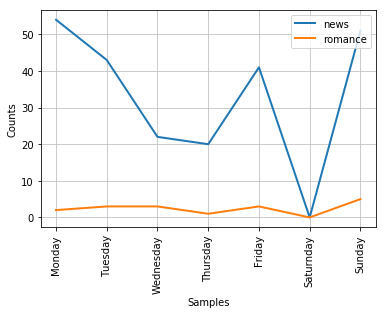

In [83]:
from nltk.corpus import brown
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturnday', 'Sunday']
genres = ['news', 'romance']
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in genres
    for word in brown.words(categories = genre)
)
cfd.plot(conditions = genres, samples = days)


In [84]:
cfd.tabulate(samples = days)

           Monday   Tuesday Wednesday  Thursday    Friday Saturnday    Sunday 
   news        54        43        22        20        41         0        51 
romance         2         3         3         1         3         0         5 


In [85]:
word = 'abcdefg'

In [86]:
word[-1]

'g'

In [89]:
entries = nltk.corpus.cmudict.entries()
p3 = [(pron[0]+'-'+pron[2], word)
      for (word, pron) in entries
      if pron[0] == 'P' and len(pron) == 3]
cfd = nltk.ConditionalFreqDist(p3)
for template in sorted(cfd.conditions()):
    if len(cfd[template]) > 10:
        words = sorted(cfd[template])
        wordstring = ' '.join(words)
        print(template, wordstring[:70] + "...")

P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn...
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh...
P-Z p's p.'s p.s pais paiz pao's pas pause paws pays paz peas pease pei's ...


In [93]:
cfd.conditions()

['P-P',
 'P-R',
 'P-SH',
 'P-K',
 'P-S',
 'P-D',
 'P-TH',
 'P-F',
 'P-JH',
 'P-L',
 'P-IY0',
 'P-N',
 'P-Z',
 'P-T',
 'P-M',
 'P-NG',
 'P-CH',
 'P-V',
 'P-ER0',
 'P-ER1',
 'P-G',
 'P-AH0',
 'P-OW0',
 'P-OW1',
 'P-UW1',
 'P-AA1',
 'P-EY1',
 'P-IY1',
 'P-AW1',
 'P-OY1',
 'P-AY1',
 'P-B']

In [95]:
from nltk.corpus import swadesh
swadesh.fileids()

['be',
 'bg',
 'bs',
 'ca',
 'cs',
 'cu',
 'de',
 'en',
 'es',
 'fr',
 'hr',
 'it',
 'la',
 'mk',
 'nl',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'sr',
 'sw',
 'uk']

In [98]:
swadesh.words('sr')

['ја',
 'ти',
 'он',
 'ми',
 'ви',
 'она',
 'ово',
 'то',
 'овде',
 'тамо',
 'ко',
 'што',
 'где',
 'кад',
 'како',
 'не',
 'све',
 'много',
 'неколико',
 'мало',
 'други',
 'један',
 'два',
 'три',
 'четири',
 'пет',
 'велик',
 'дуг',
 'широк',
 'туст',
 'тежак',
 'мал',
 'кратак',
 'узак',
 'танак',
 'жена',
 'мушкарац',
 'човек',
 'дете',
 'жена',
 'супруг',
 'мајка',
 'отац',
 'животиња',
 'риба',
 'птица',
 'пас',
 'уш',
 'змија',
 'црв',
 'дрво',
 'гора',
 'палица',
 'плод',
 'семе',
 'лист',
 'корен',
 'кора',
 'цвет',
 'трава',
 'канап',
 'кожа',
 'месо',
 'крв',
 'кост',
 'сало',
 'јаје',
 'рог',
 'реп',
 'перо',
 'влас',
 'глава',
 'уво',
 'око',
 'нос',
 'уста',
 'зуб',
 'језик',
 'нокат',
 'стопало',
 'нога',
 'колено',
 'рука',
 'крило',
 'трбух',
 'утроба',
 'шија',
 'леђа',
 'прса',
 'срце',
 'јетра',
 'пити',
 'јести',
 'гристи',
 'сисати',
 'пљувати',
 'бљувати',
 'духати',
 'дисати',
 'смејати',
 'видети',
 'чути',
 'знати',
 'мислити',
 'њушити',
 'страховати',
 'спа

In [99]:
en2ru = swadesh.entries(['en', 'ru'])

In [101]:
swadesh.readme()

'Swadesh Wordlists\n\nDerived from\nhttp://en.wiktionary.org/wiki/Appendix:Swadesh_list\n(incomplete)\n'

In [112]:
from nltk.corpus import wordnet as wn

In [113]:
 dir(wn.synset('harmony.n.02'))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_hypernyms',
 '_definition',
 '_examples',
 '_frame_ids',
 '_hypernyms',
 '_instance_hypernyms',
 '_iter_hypernym_lists',
 '_lemma_names',
 '_lemma_pointers',
 '_lemmas',
 '_lexname',
 '_max_depth',
 '_min_depth',
 '_name',
 '_needs_root',
 '_offset',
 '_pointers',
 '_pos',
 '_related',
 '_shortest_hypernym_paths',
 '_wordnet_corpus_reader',
 'also_sees',
 'attributes',
 'causes',
 'closure',
 'common_hypernyms',
 'definition',
 'entailments',
 'examples',
 'frame_ids',
 'hypernym_distances',
 'hypernym_paths',
 'hypernyms',
 'hyponyms',
 'instance_hypernyms',
 'instance_hyponyms',
 'jcn